<a href="https://colab.research.google.com/github/sncmht/patika/blob/main/aygazproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [125]:
# Veriyi yükleme
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [126]:
# eksik veri kontrol edildi
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

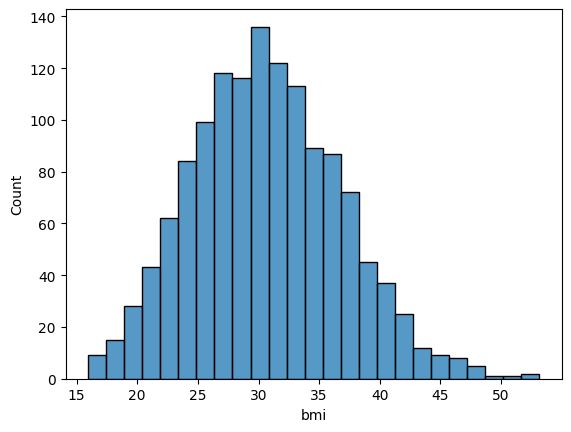

In [127]:
# Bmi dağılımını inceleyin
sns.histplot(df['bmi']);

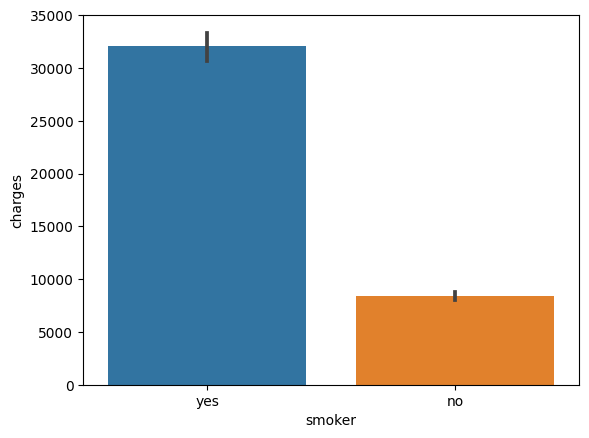

In [128]:
# "smoker" ile "charges" arasındaki ilişkiyi inceleyin

sns.barplot(x=df["smoker"], y = df["charges"],data=df);

<Axes: xlabel='smoker', ylabel='count'>

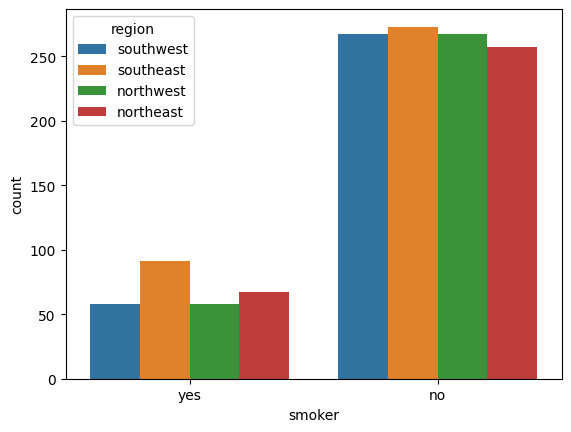

In [129]:
# "smoker" ile "region" arasındaki ilişkiyi inceleyin
sns.countplot(x=df['smoker'], hue=df['region'])

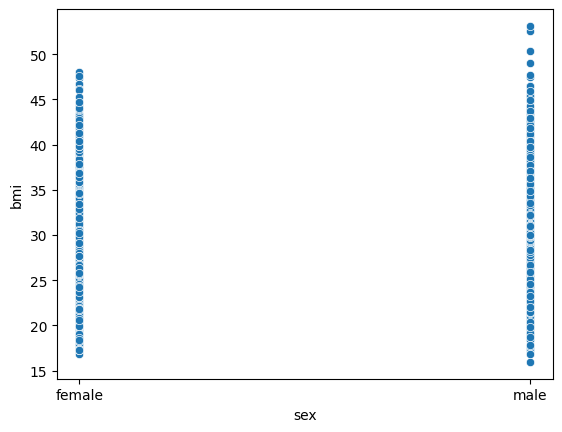

In [130]:
# "Bmi" ile "sex" arasındaki ilişkiyi inceleyin
sns.scatterplot(x=df['sex'], y=df['bmi']);

In [131]:
# En fazla "children" sahip olan "region" bulun
max_children_region = df.groupby('region')['children'].sum().idxmax()

In [132]:
max_children_region

'southeast'

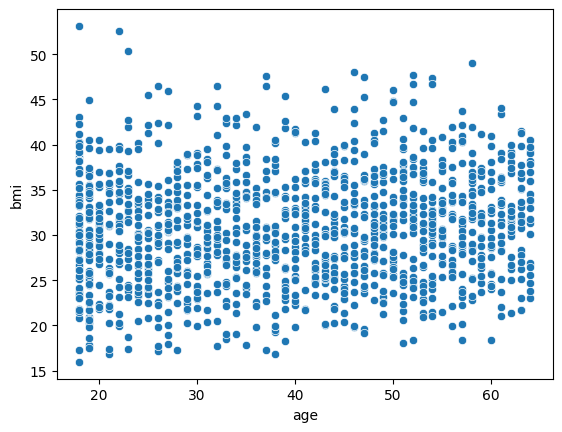

In [133]:
# "age" ile "bmi" arasındaki ilişkiyi inceleyin
sns.scatterplot(x=df['age'], y=df['bmi']);

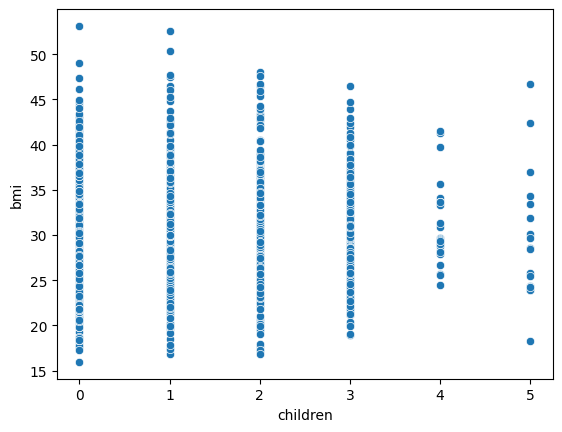

In [134]:
# "Bmi" ile "children" arasındaki ilişkiyi inceleyin
sns.scatterplot(x=df['children'], y=df['bmi']);


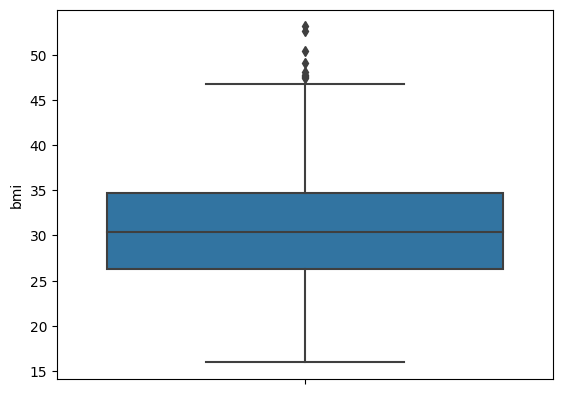

In [135]:
sns.boxplot(y=df["bmi"]);

<Axes: xlabel='bmi', ylabel='charges'>

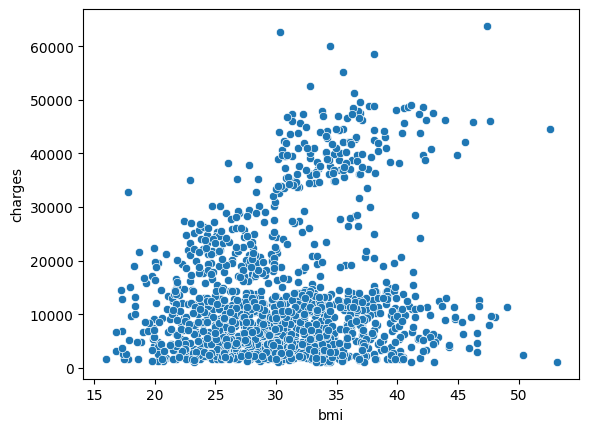

In [136]:
# "Bmi" ile "charges" arasındaki ilişkiyi inceleyin
sns.scatterplot(x=df['bmi'], y=df['charges'])

<Axes: xlabel='region', ylabel='bmi'>

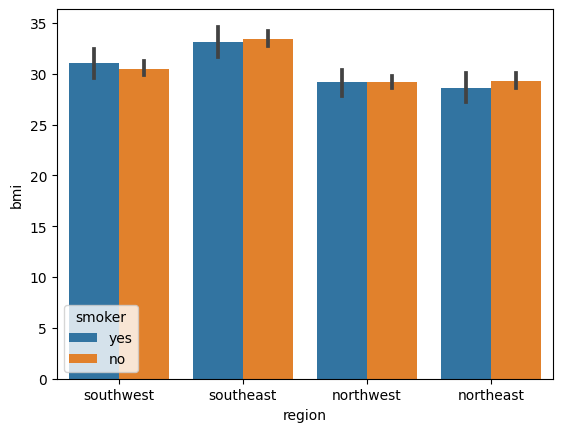

In [137]:
# "region", "smoker" ve "bmi" arasındaki ilişkiyi çubuk grafik kullanarak inceleyin
sns.barplot(x=df['region'], y=df['bmi'], hue=df['smoker'])

In [138]:
# Kategorik değişkenleri etiket kodlama ile dönüştürme
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])


In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [141]:
# Bağımsız değişkenler(X) ve bağımlı değişken(y) olarak ayırma
X = df.drop('charges', axis=1)
y = df['charges']

In [142]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [143]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [144]:
# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [147]:
# Linear Regression modelini eğitme ve değerlendirme
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_scores = cross_val_score(linear_reg, X_train, y_train, cv=5)

In [148]:
linear_reg_scores

array([0.71605226, 0.80286251, 0.72459593, 0.65909301, 0.76711092])

In [149]:
# 5 katlı çapraz doğrulama
linear_reg_rmse = np.sqrt(mean_squared_error(y_train, linear_reg.predict(X_train)))
linear_reg_mae = mean_absolute_error(y_train, linear_reg.predict(X_train))

In [150]:
linear_reg_rmse

6105.789320191615

In [151]:
linear_reg_mae

4208.762029186575

In [152]:
# Random Forest Regressor modelini eğitme ve değerlendirme
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_scores = cross_val_score(rf_reg, X_train, y_train, cv=5)
rf_reg_rmse = np.sqrt(mean_squared_error(y_train, rf_reg.predict(X_train)))
rf_reg_mae = mean_absolute_error(y_train, rf_reg.predict(X_train))

In [153]:
rf_reg_scores

array([0.8167772 , 0.89956761, 0.79780111, 0.78159341, 0.83734113])

In [154]:
rf_reg_rmse

1919.7647108362096

In [155]:
rf_reg_mae

1046.7950025128048